# Exercise 02 - Sample Solution

In [4]:
%matplotlib inline

#!pip install brewer2mpl # uncomment if brewer2mpl is not found

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
import seaborn as sns
import warnings
from matplotlib import rcParams
from IPython.display import Image
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 10
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
sns.set_style('white')

In [6]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [7]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

#mpath = '' # local files
mpath = "/content/gdrive/My Drive/Colab Notebooks/Data Science Class/Exercise/"
spath = "/content/gdrive/My Drive/Colab Notebooks/" # path to save your image files

Mounted at /content/gdrive


In [8]:
dfolive = pd.read_csv(mpath+'data/olive.csv')
dfolive.rename(columns=dict(zip(dfolive.columns[:3], ['areastring', 'region', 'area'])), inplace=True) # rename the columns
dfolive.areastring = dfolive.areastring.map(lambda x: x.split('.')[-1]) # remove the numbering
acidlist = dfolive.columns[3:] # get the column names of the fatty acids
dfolive[acidlist] = dfolive[acidlist].apply(lambda x: x/100.0) # transform the values of the fatty acids into percentages
# create dictionary for region names
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}

## Exercise 1: Small Multiples
Make scatterplots of the acids in the list yacids against the acids in the list xacids. As the names suggest, plot the acids in yacids along the y axis and the acids in xacids along the x axis. Label the axes with the respective acid name. Set it up as a grid with 3 rows and 2 columns.<br>
- xacids: 'oleic','linolenic','eicosenoic'
- yacids: 'stearic','arachidic'

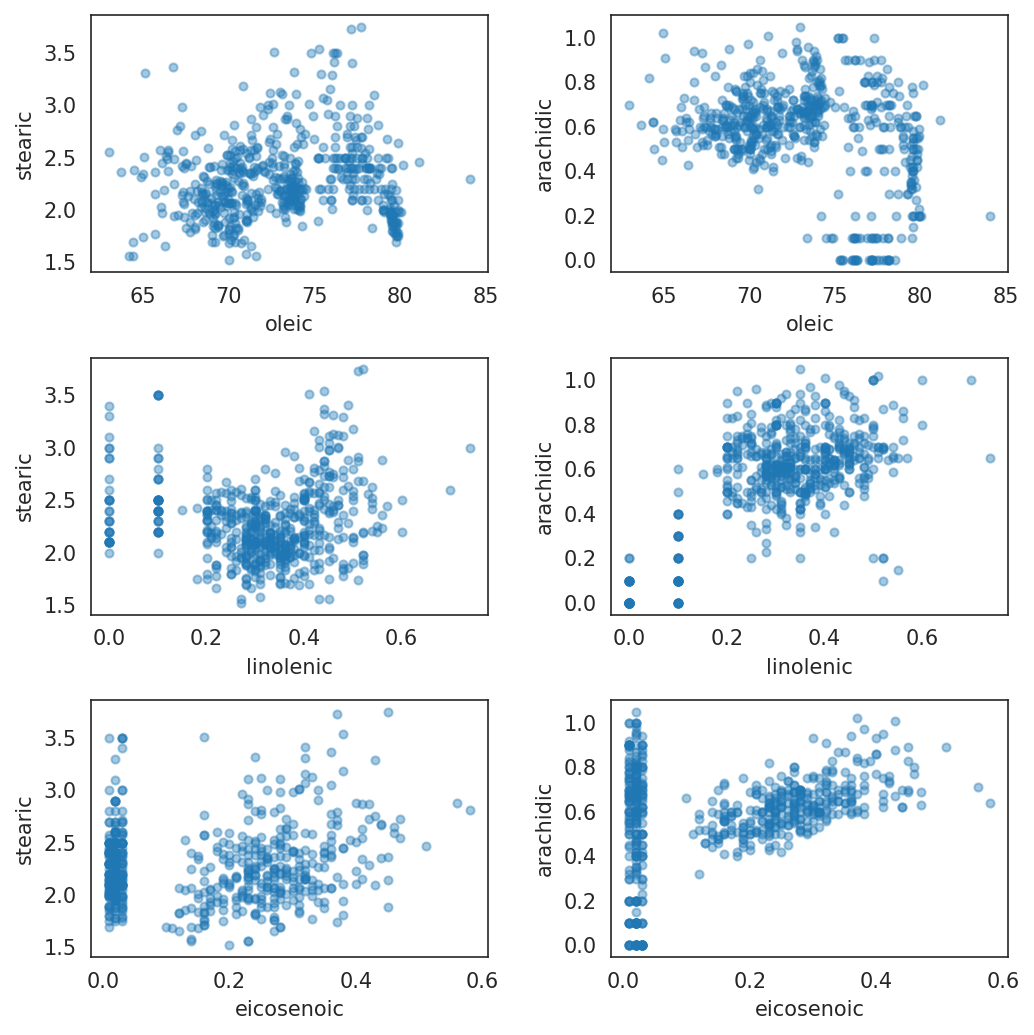

In [9]:
xacids = ['oleic','linolenic','eicosenoic']
yacids = ['stearic','arachidic']
fig, axes = plt.subplots(figsize=(7,7), nrows=len(xacids), ncols=len(yacids))
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(dfolive[xacid], dfolive[yacid], s=15,alpha=0.4)
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()

The data exhibits clusters, e.g. for the plot stearic vs eicosenoic there are clearly two separated clusters (left, right).
Some cluster shapes appear suspicious (maybe a data problem?), ie. the left clusters in the two plots in the lowest row. If the data was ok, these two clusters would indicate weak dependence, i.e. you can change the y-value whatever you like and the x-value stays (almost) the same.
Some clusters show a correlation between varialbes, ie. the right cluster in the right plot in the lowest row.

## Exercise 2: Multiple Histograms
a) Create the multiple histograms shown in the demo by using seaborn library.

In [10]:
histstyle = {"histtype": "step", "linewidth": 2, "alpha": 1}
colors=[dark2_cmap.mpl_colormap(col) for col in [1.0,0.5,0.0]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

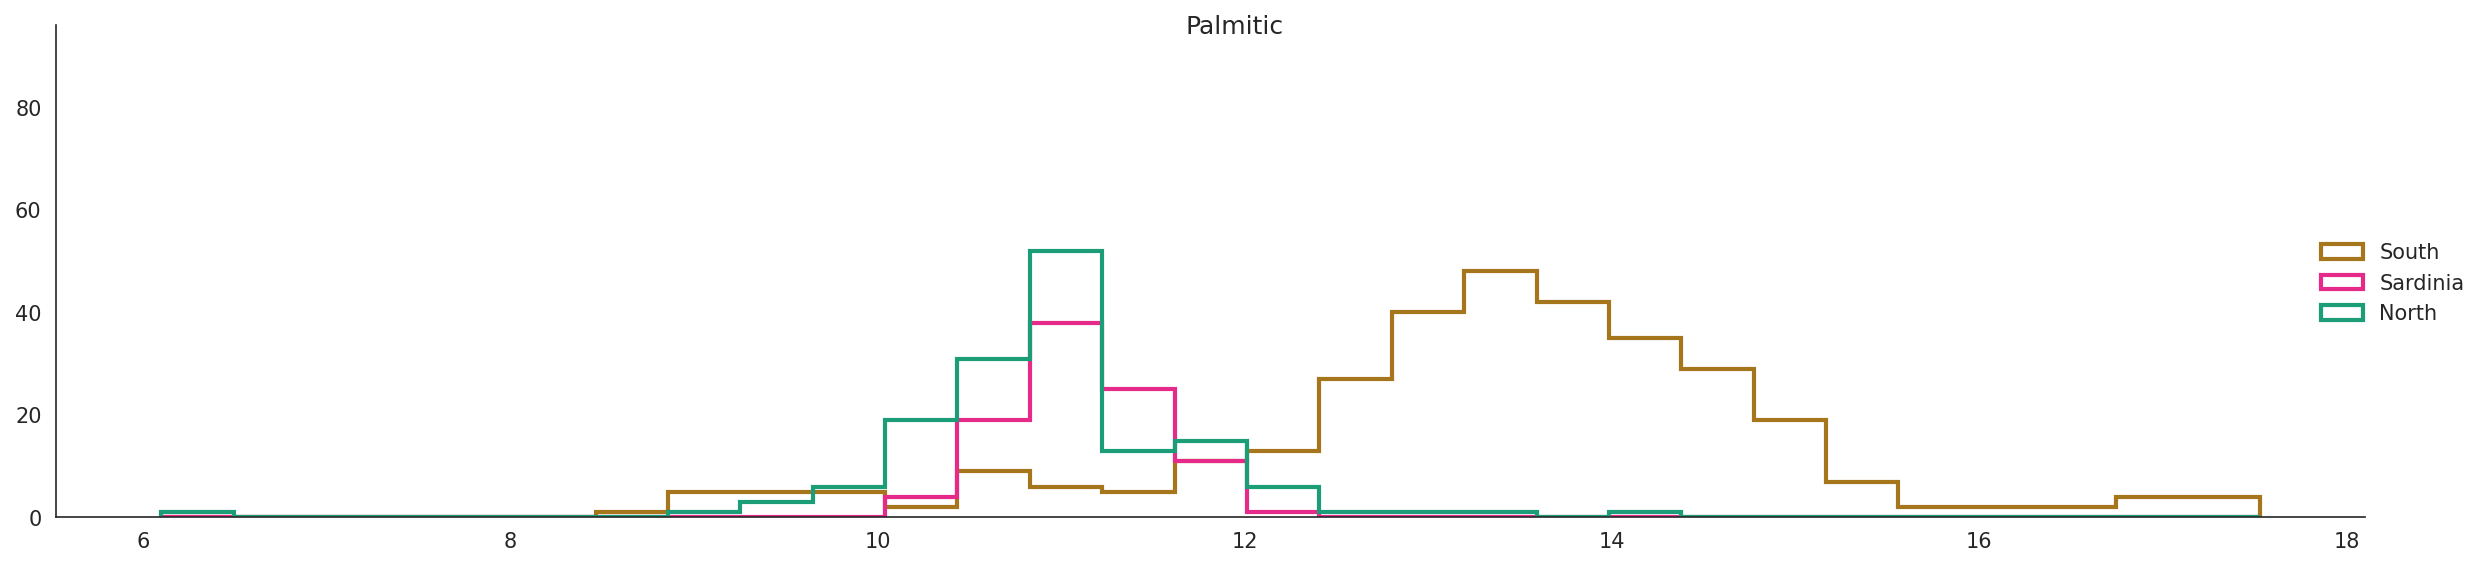

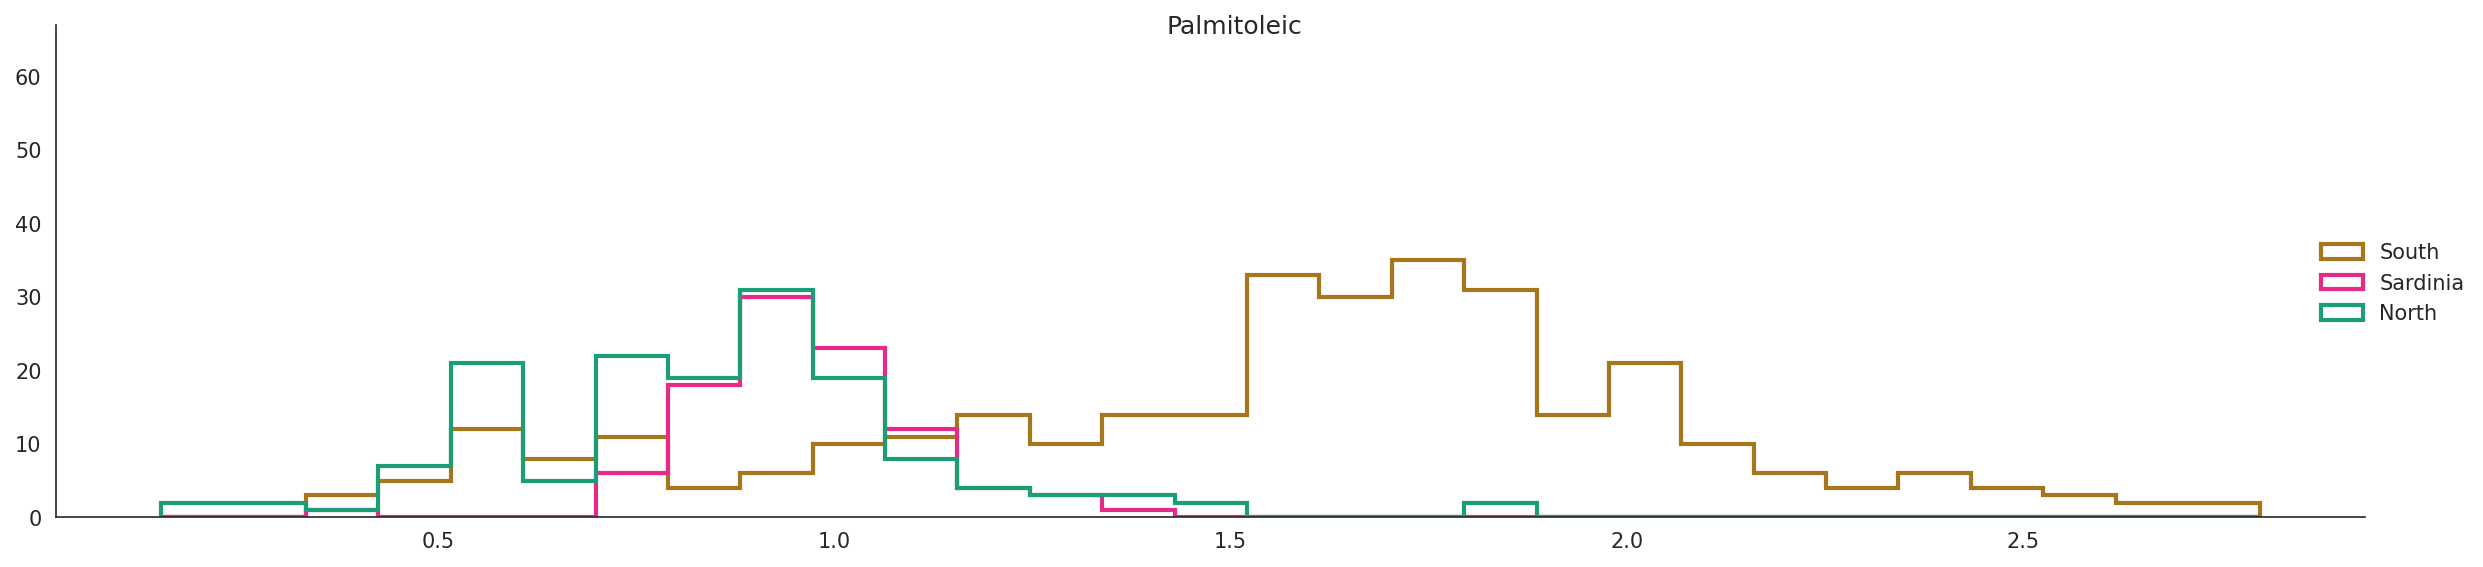

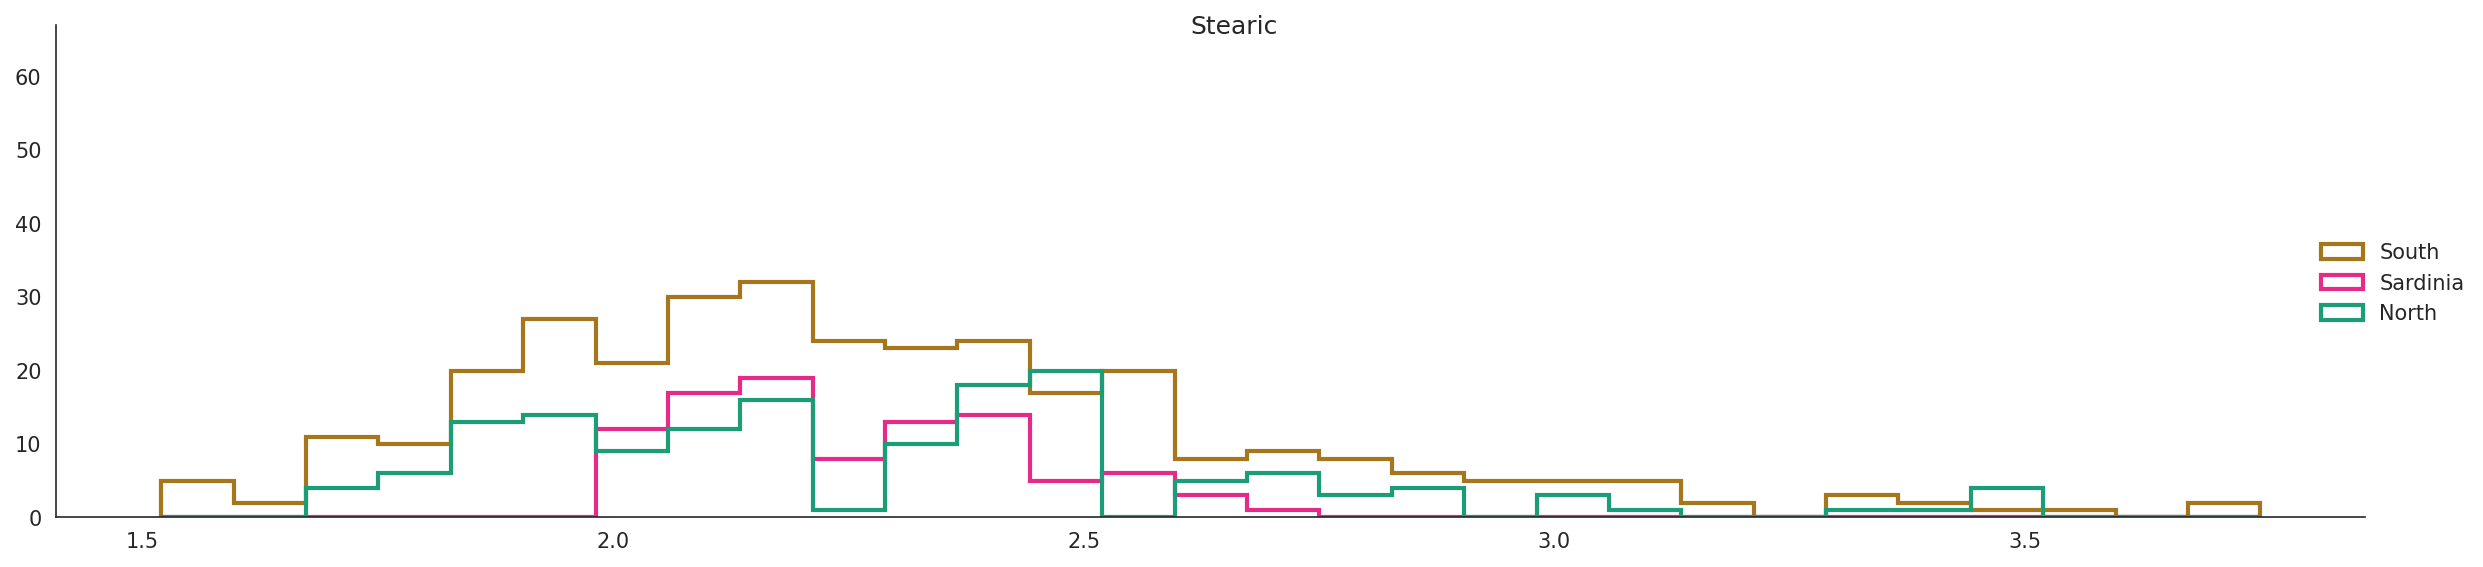

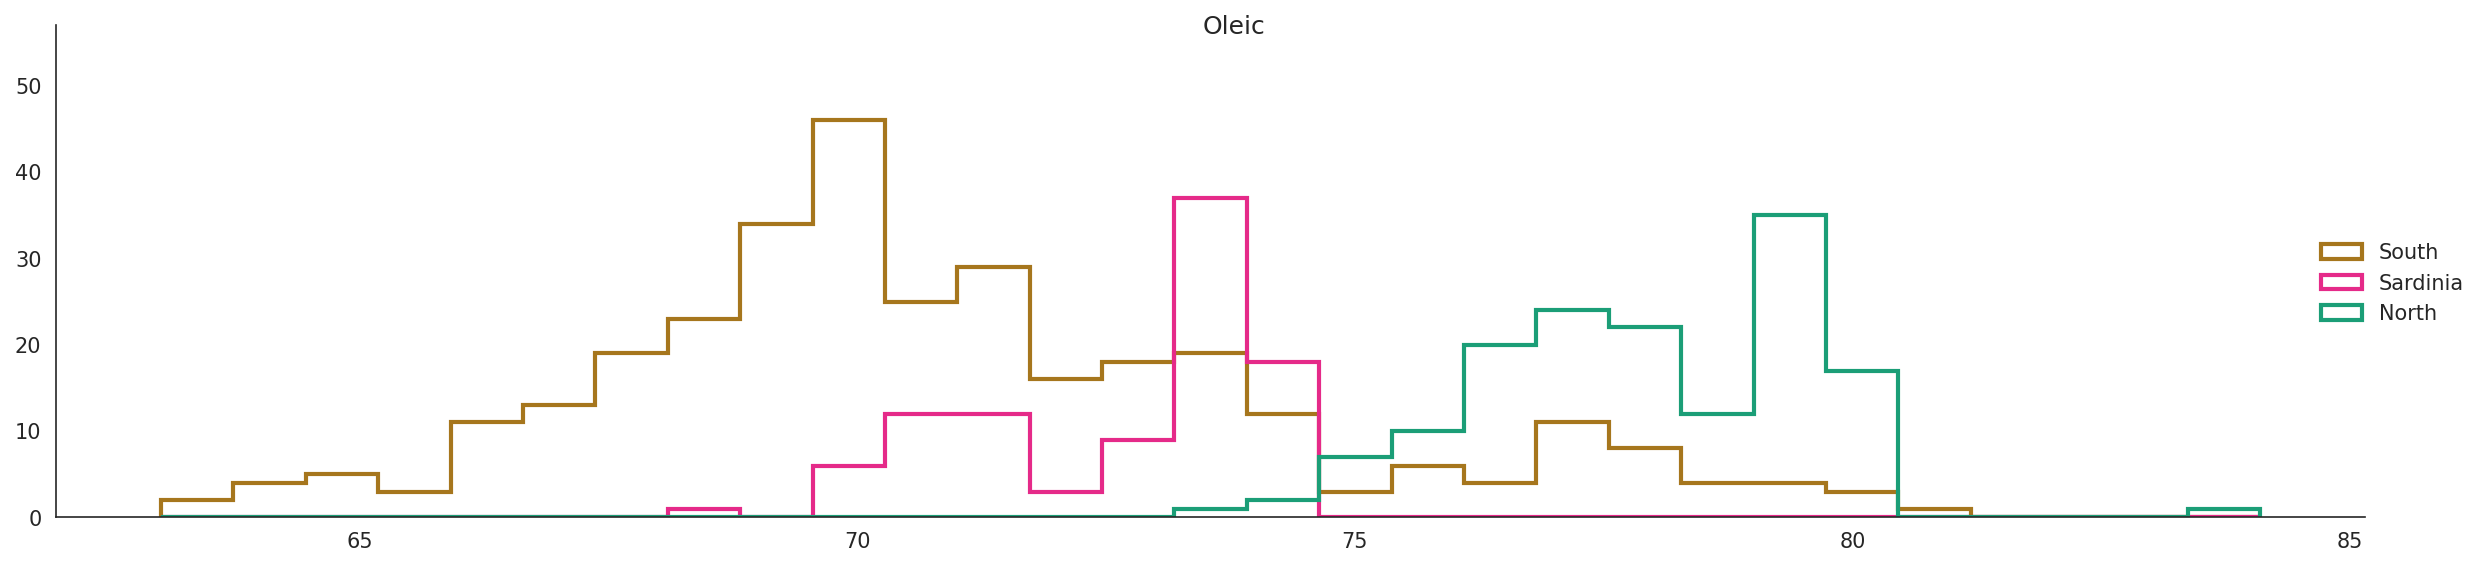

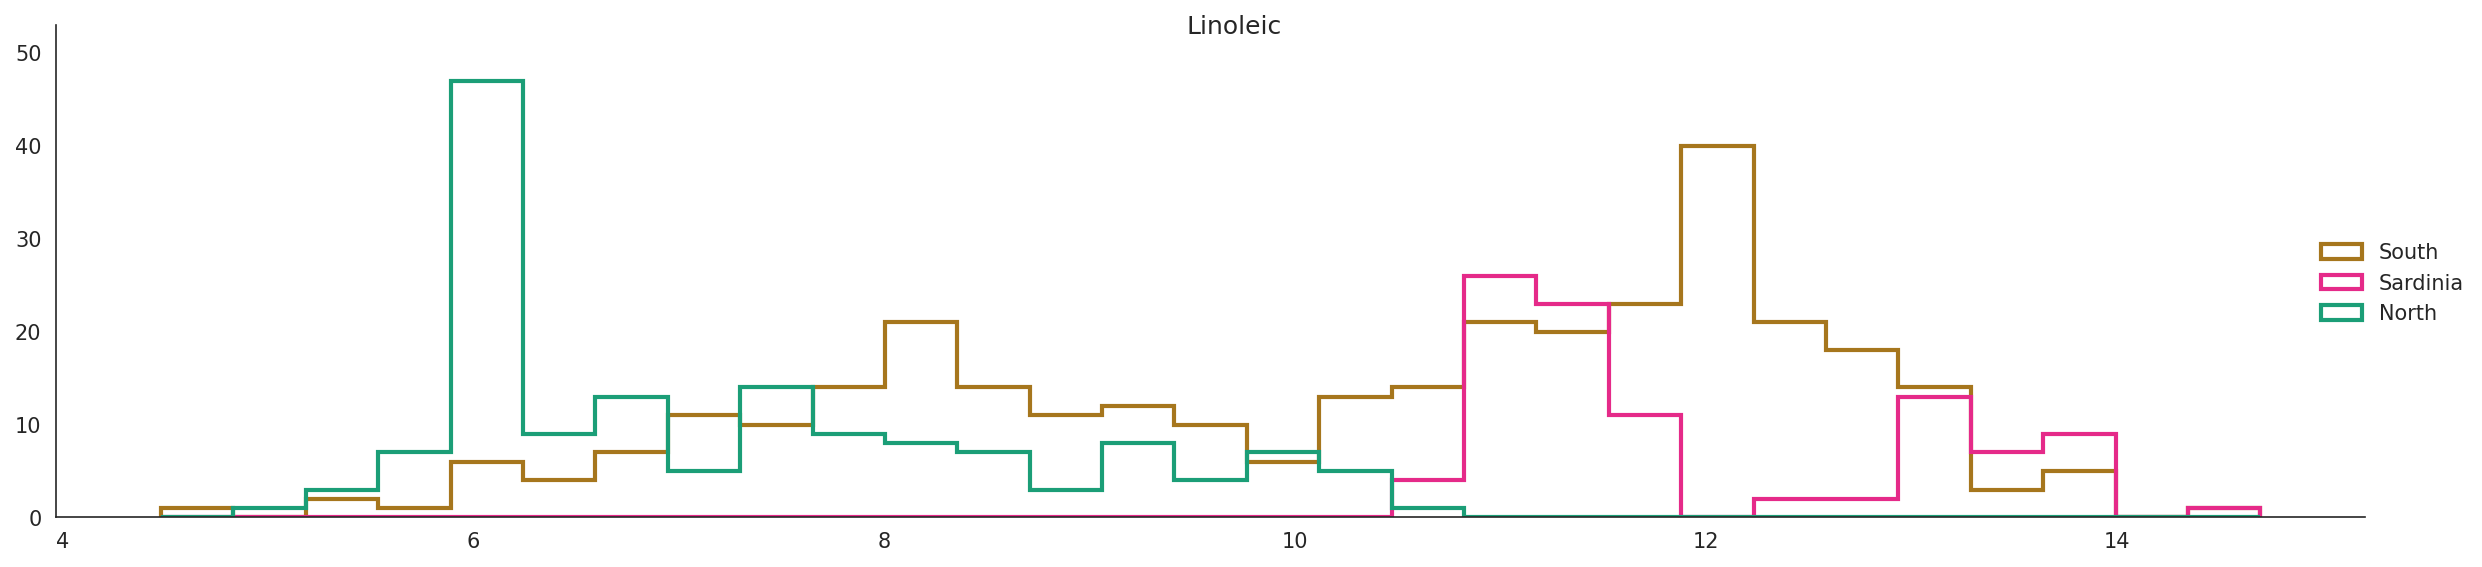

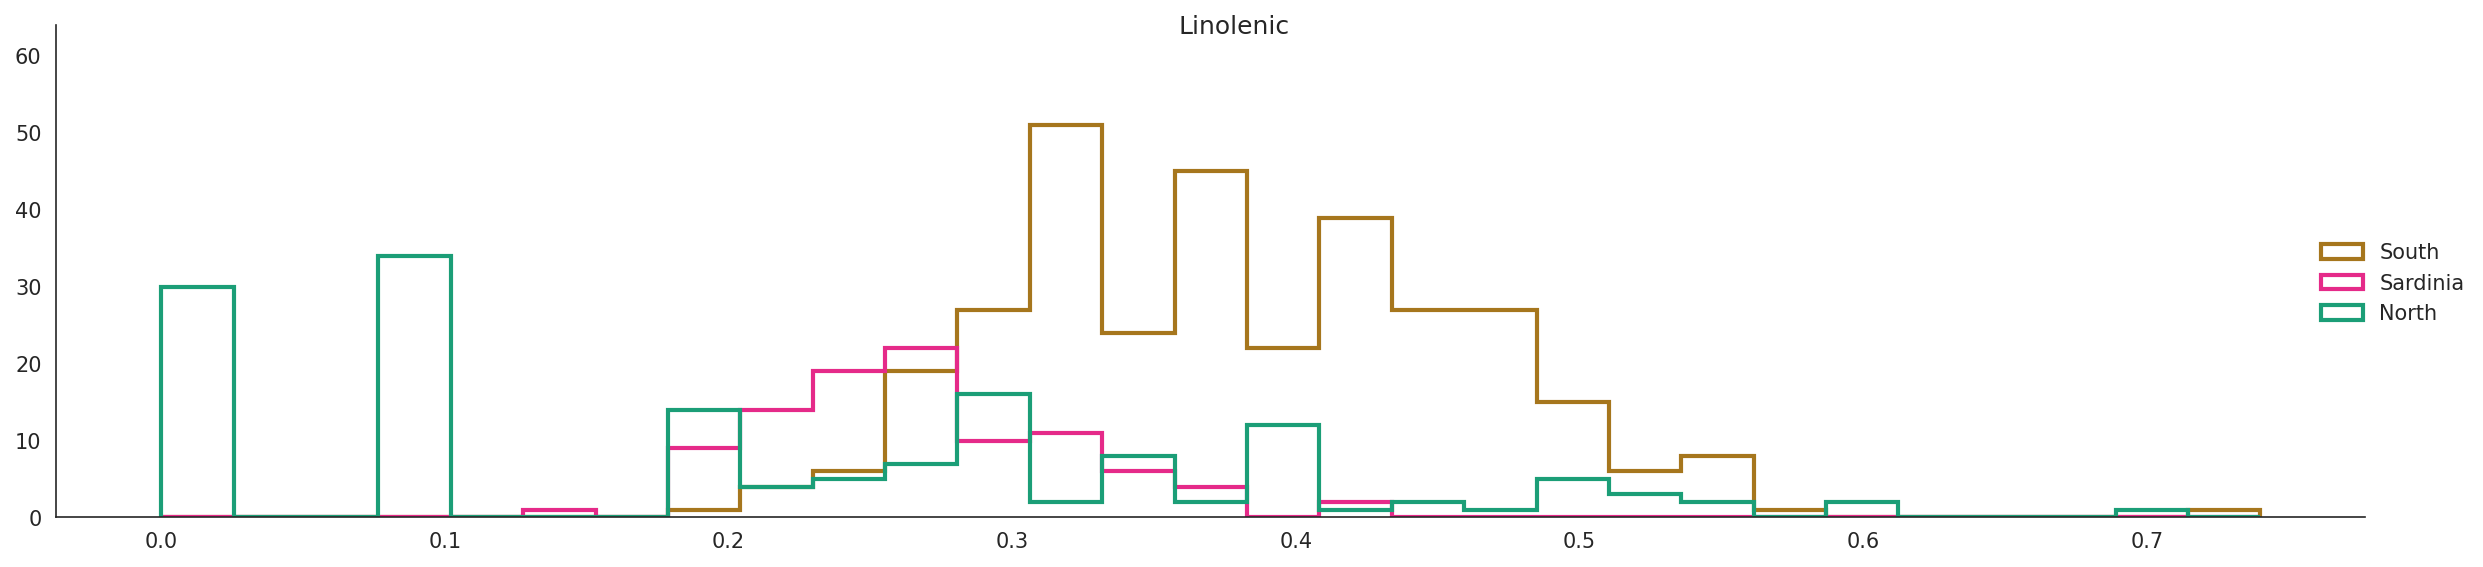

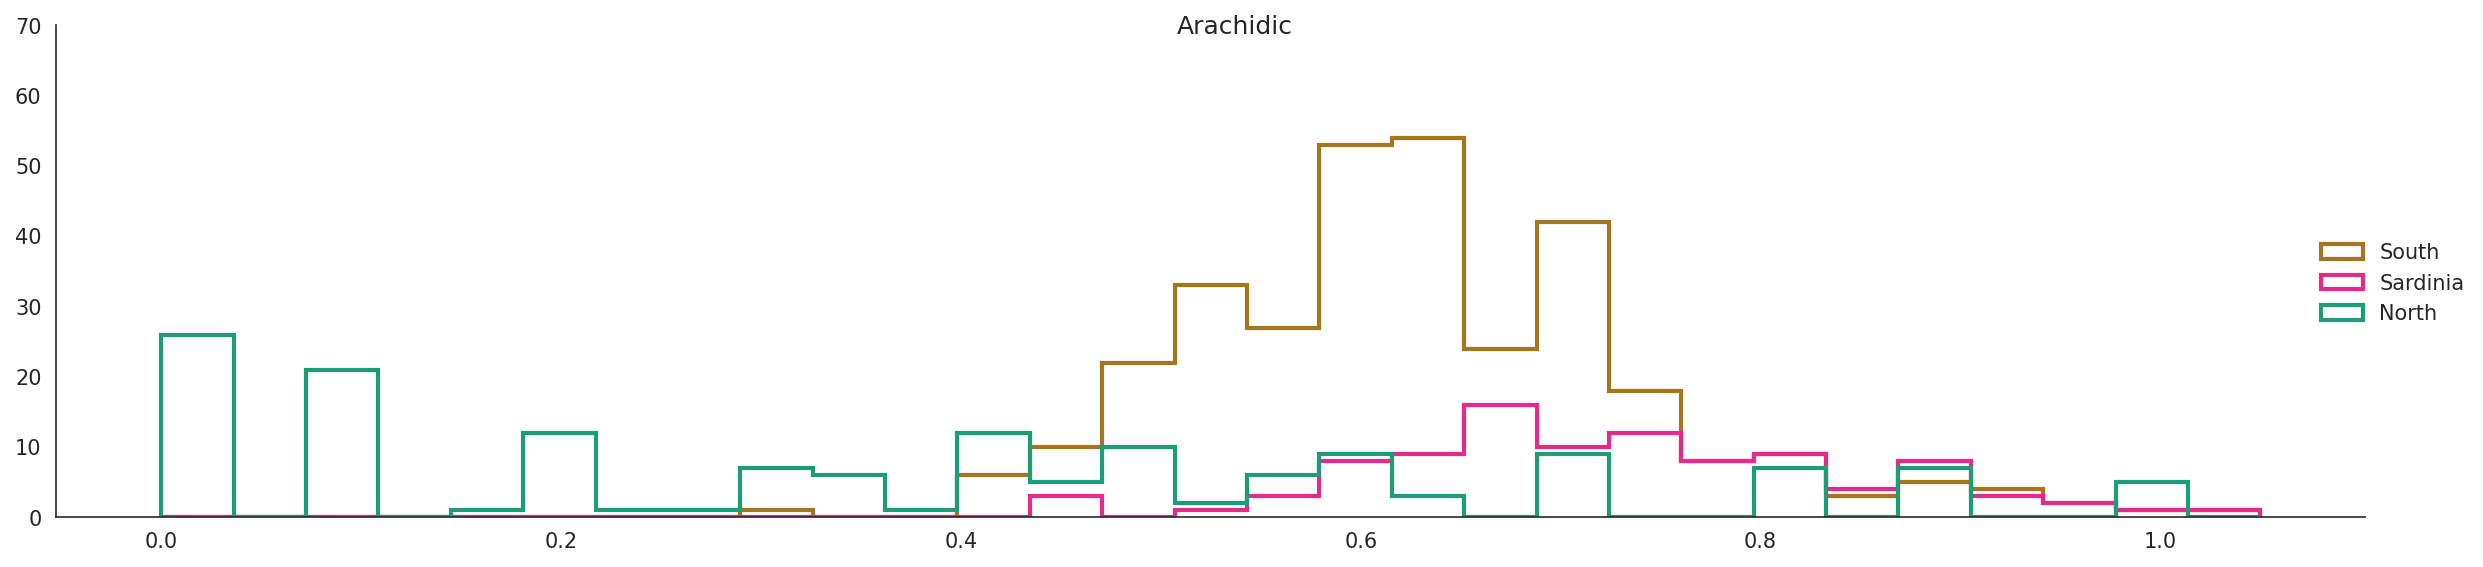

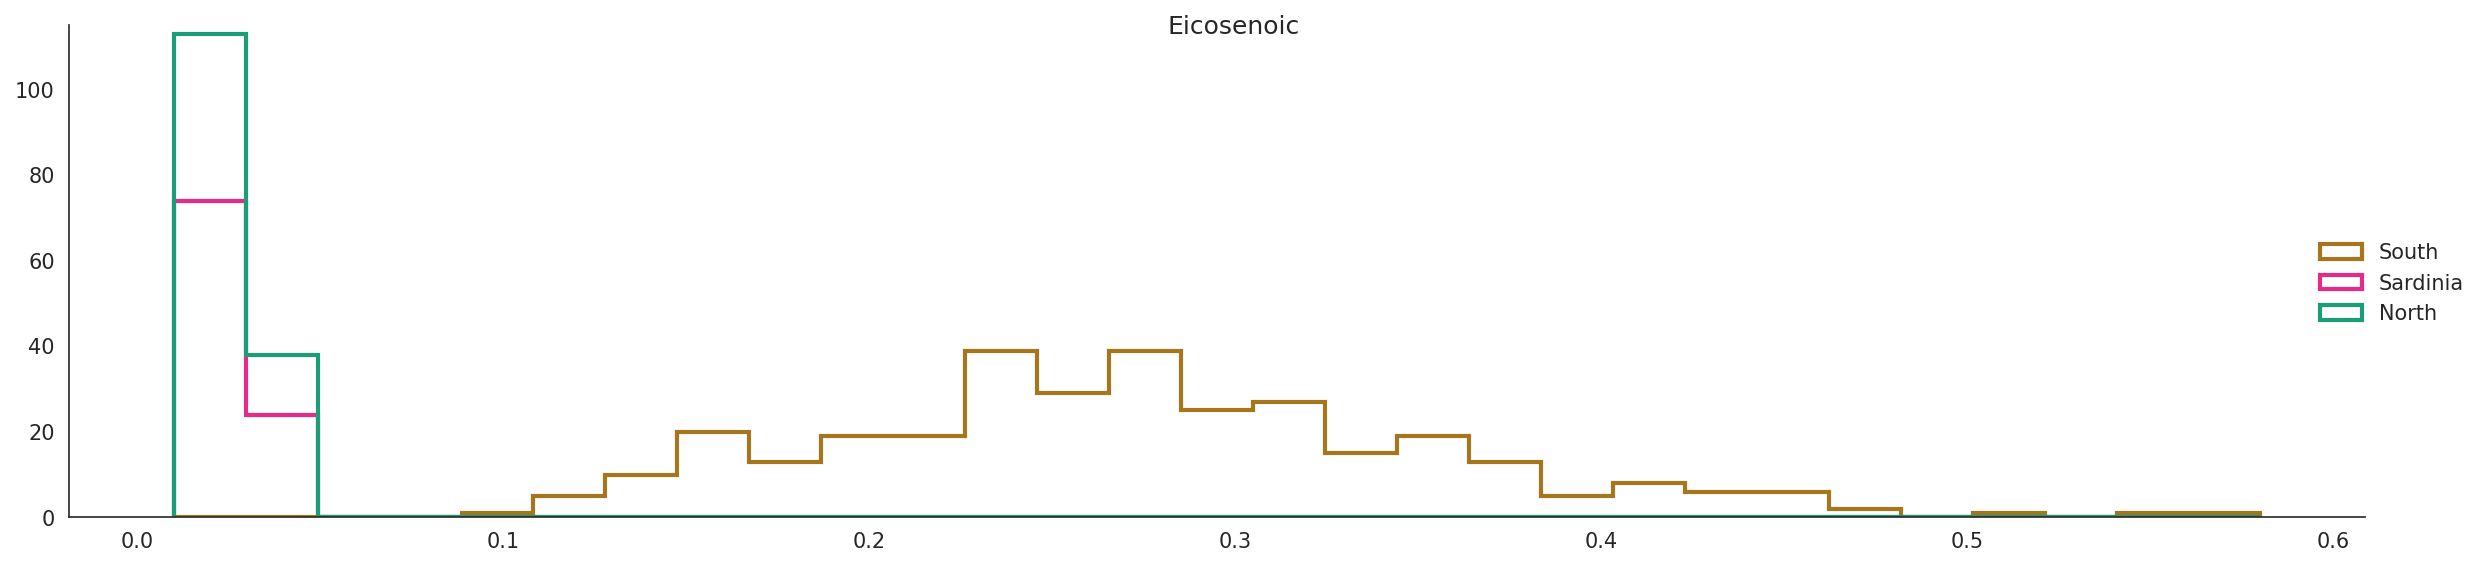

In [11]:
# FacetGrid plots as subplots
for acid in acidlist:
    seriesacid = dfolive[acid] # get the Pandas series
    minmax = [seriesacid.min(), seriesacid.max()]        
    histbinslist = np.linspace(minmax[0],  minmax[1], 30)  #use 30 bins
    g = sns.FacetGrid(data=dfolive, hue='region', size=4, aspect=4, legend_out=True, palette=colors)
    g.map(sns.distplot, acid, kde=False, bins=histbinslist, hist_kws=histstyle)
    g.set_xlabels('')
    counts = -np.diff([seriesacid[seriesacid>x].count() for x in histbinslist]).min() #get max elements per bin
    g.set(ylim=[0, counts])
    g.add_legend(title='')
    new_labels = rvals
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.suptitle(acid.capitalize())

b) Take a look at each fatty acids, can we use one of them to differentiate one region from another?<br>
Yes, for example the **Eicosenoic** fatty acid. It sets the olive oils from **the South region apart from the ones coming from the North or Sardinia Region**.<br>

## Exercise 3: Color Coded Scatter Plots
a) Create scatter plots between oleic and linoleic for each region.<br>
b) Create scatter plots between palmitic and palmitoleic for each region.<br>
c) Examine the plots, which regions can you separate?

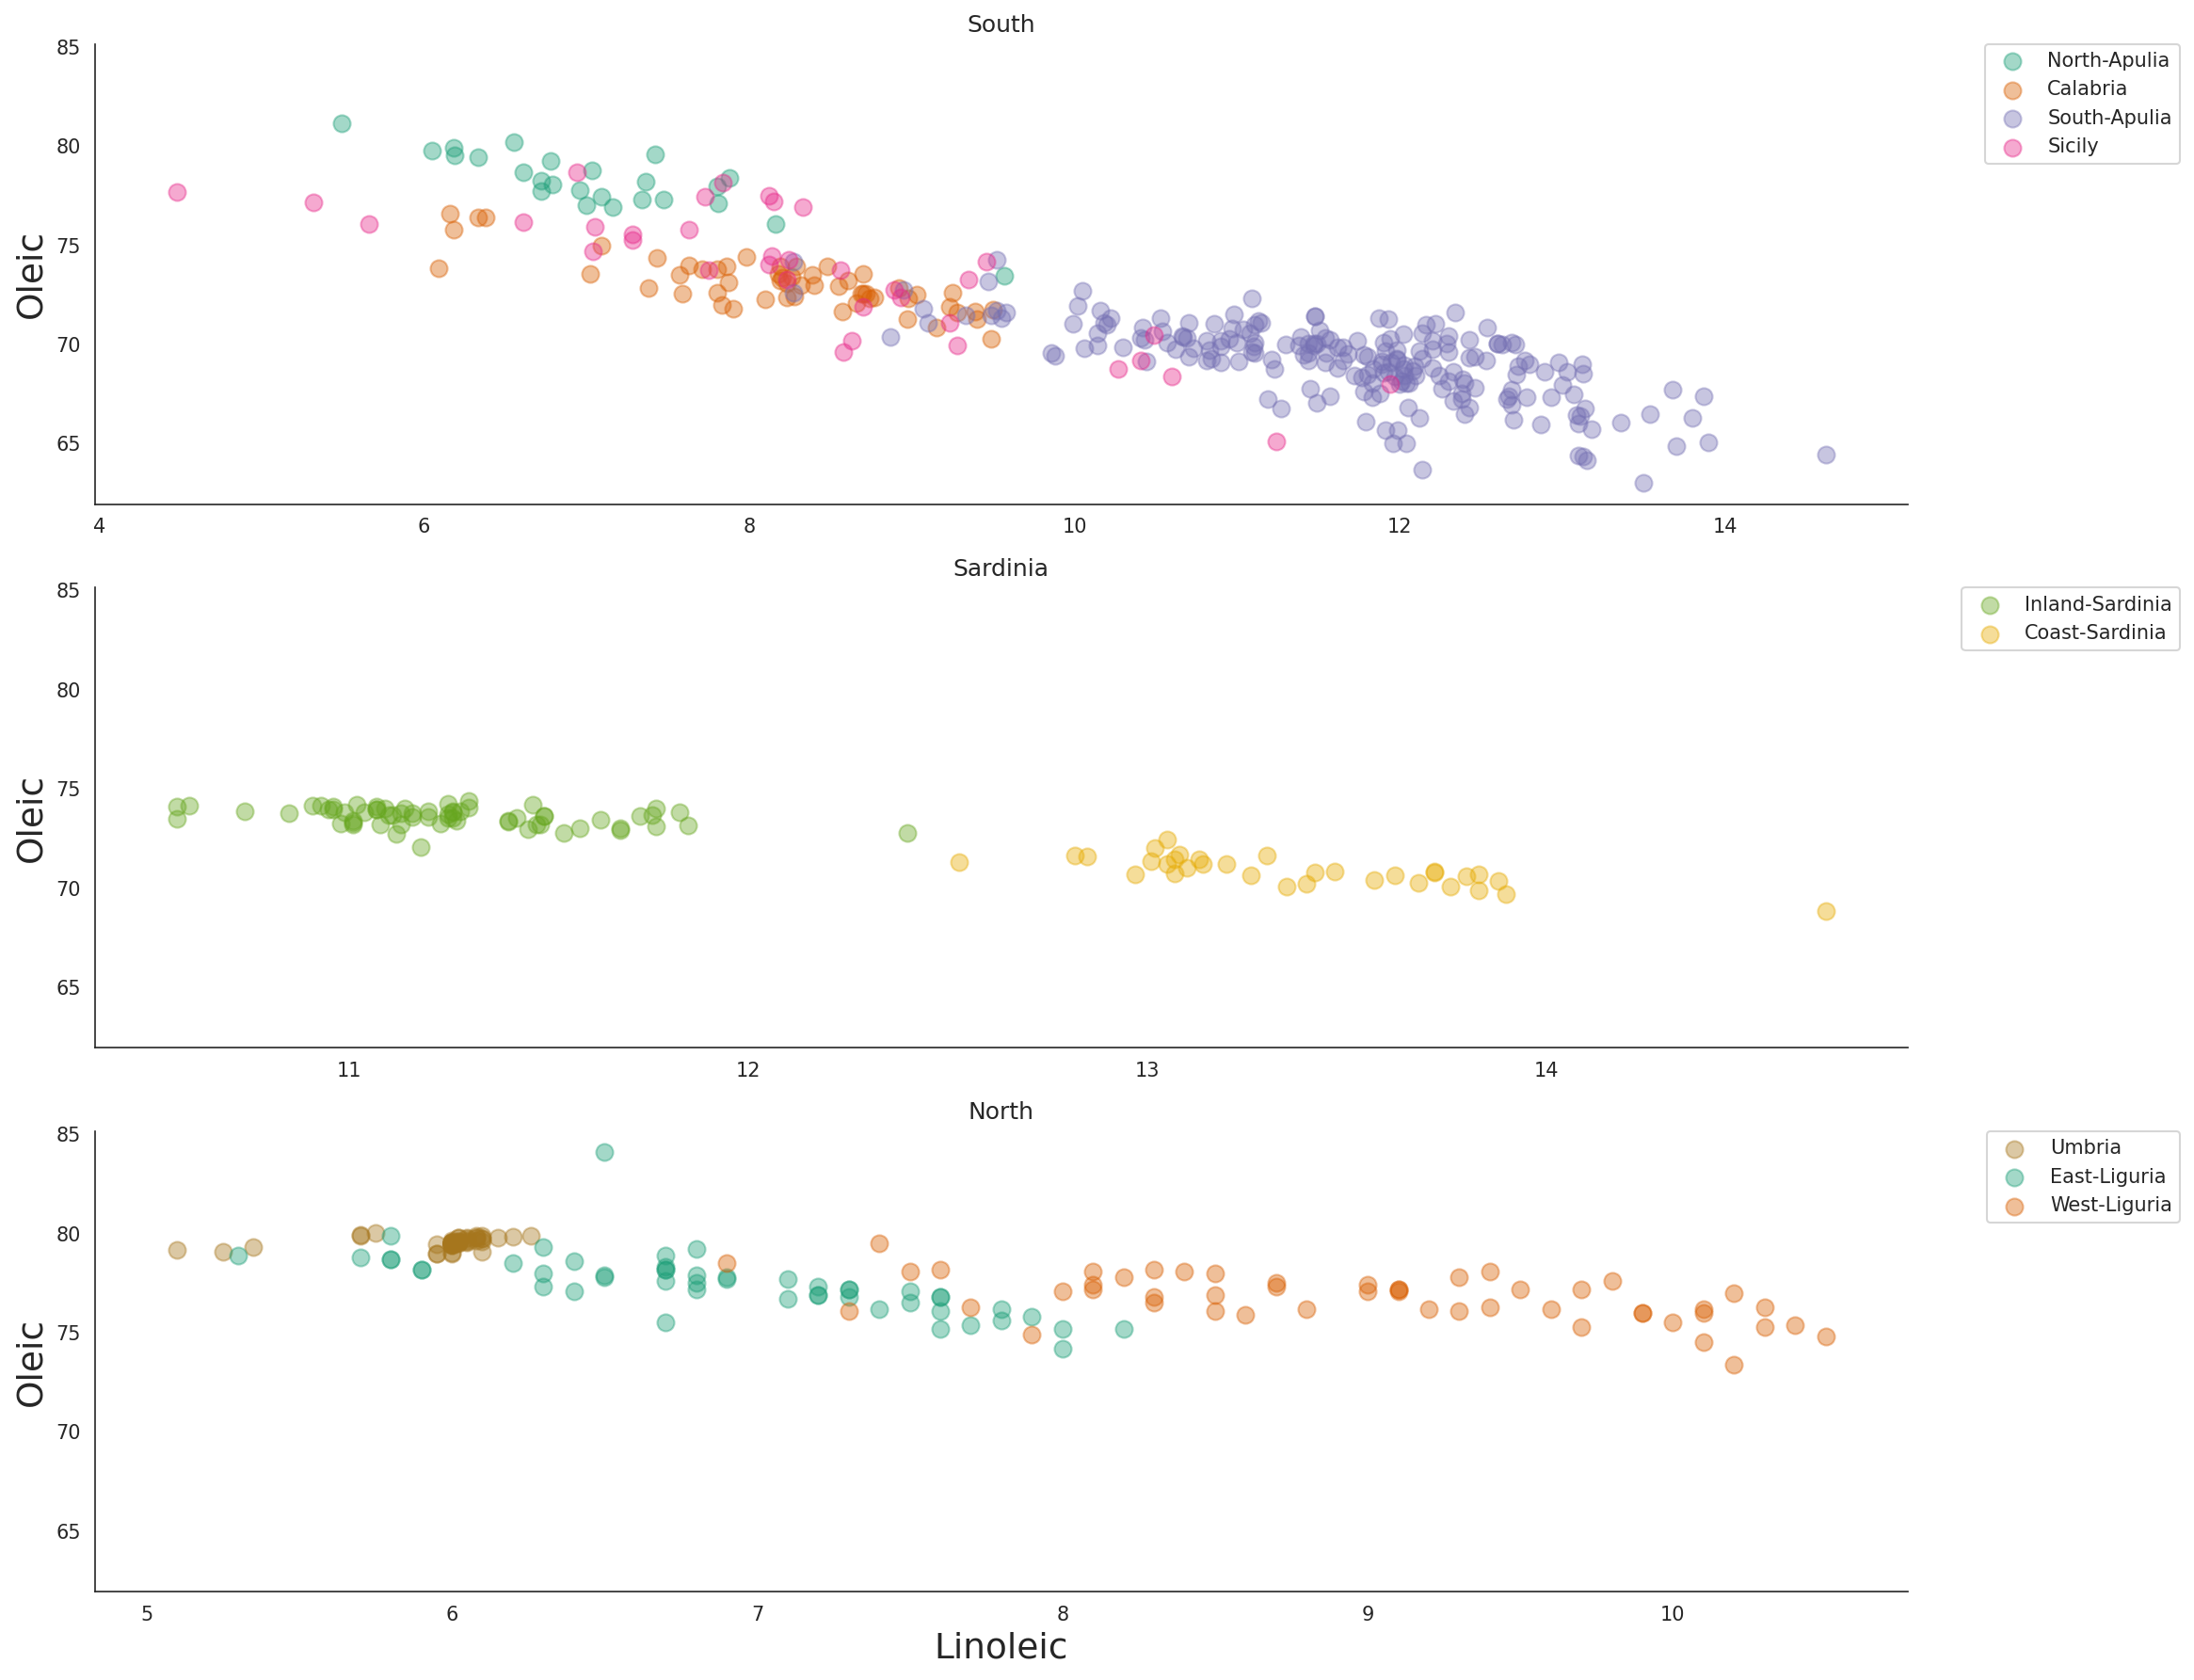

In [12]:
g = sns.FacetGrid(data=dfolive, row='region', hue='areastring', size=4, aspect=4, sharex=False, palette=dark2_colors)
g.map(plt.scatter, 'linoleic', 'oleic', s=75, alpha=0.4)
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    if i == 2: ax.set_xlabel('Linoleic', fontsize=18)
    ax.set_ylabel('Oleic', fontsize=18)
    ax.set_title(rvals[i])
    ax.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0.)
plt.tight_layout()

### Observations in respect to separability from the combination of Linoleic and Oleic fatty acids.<br>
**South**: North and South Apulia, also North-Apulia with Calabria<br>
**Sardinia**: Inland and Coast

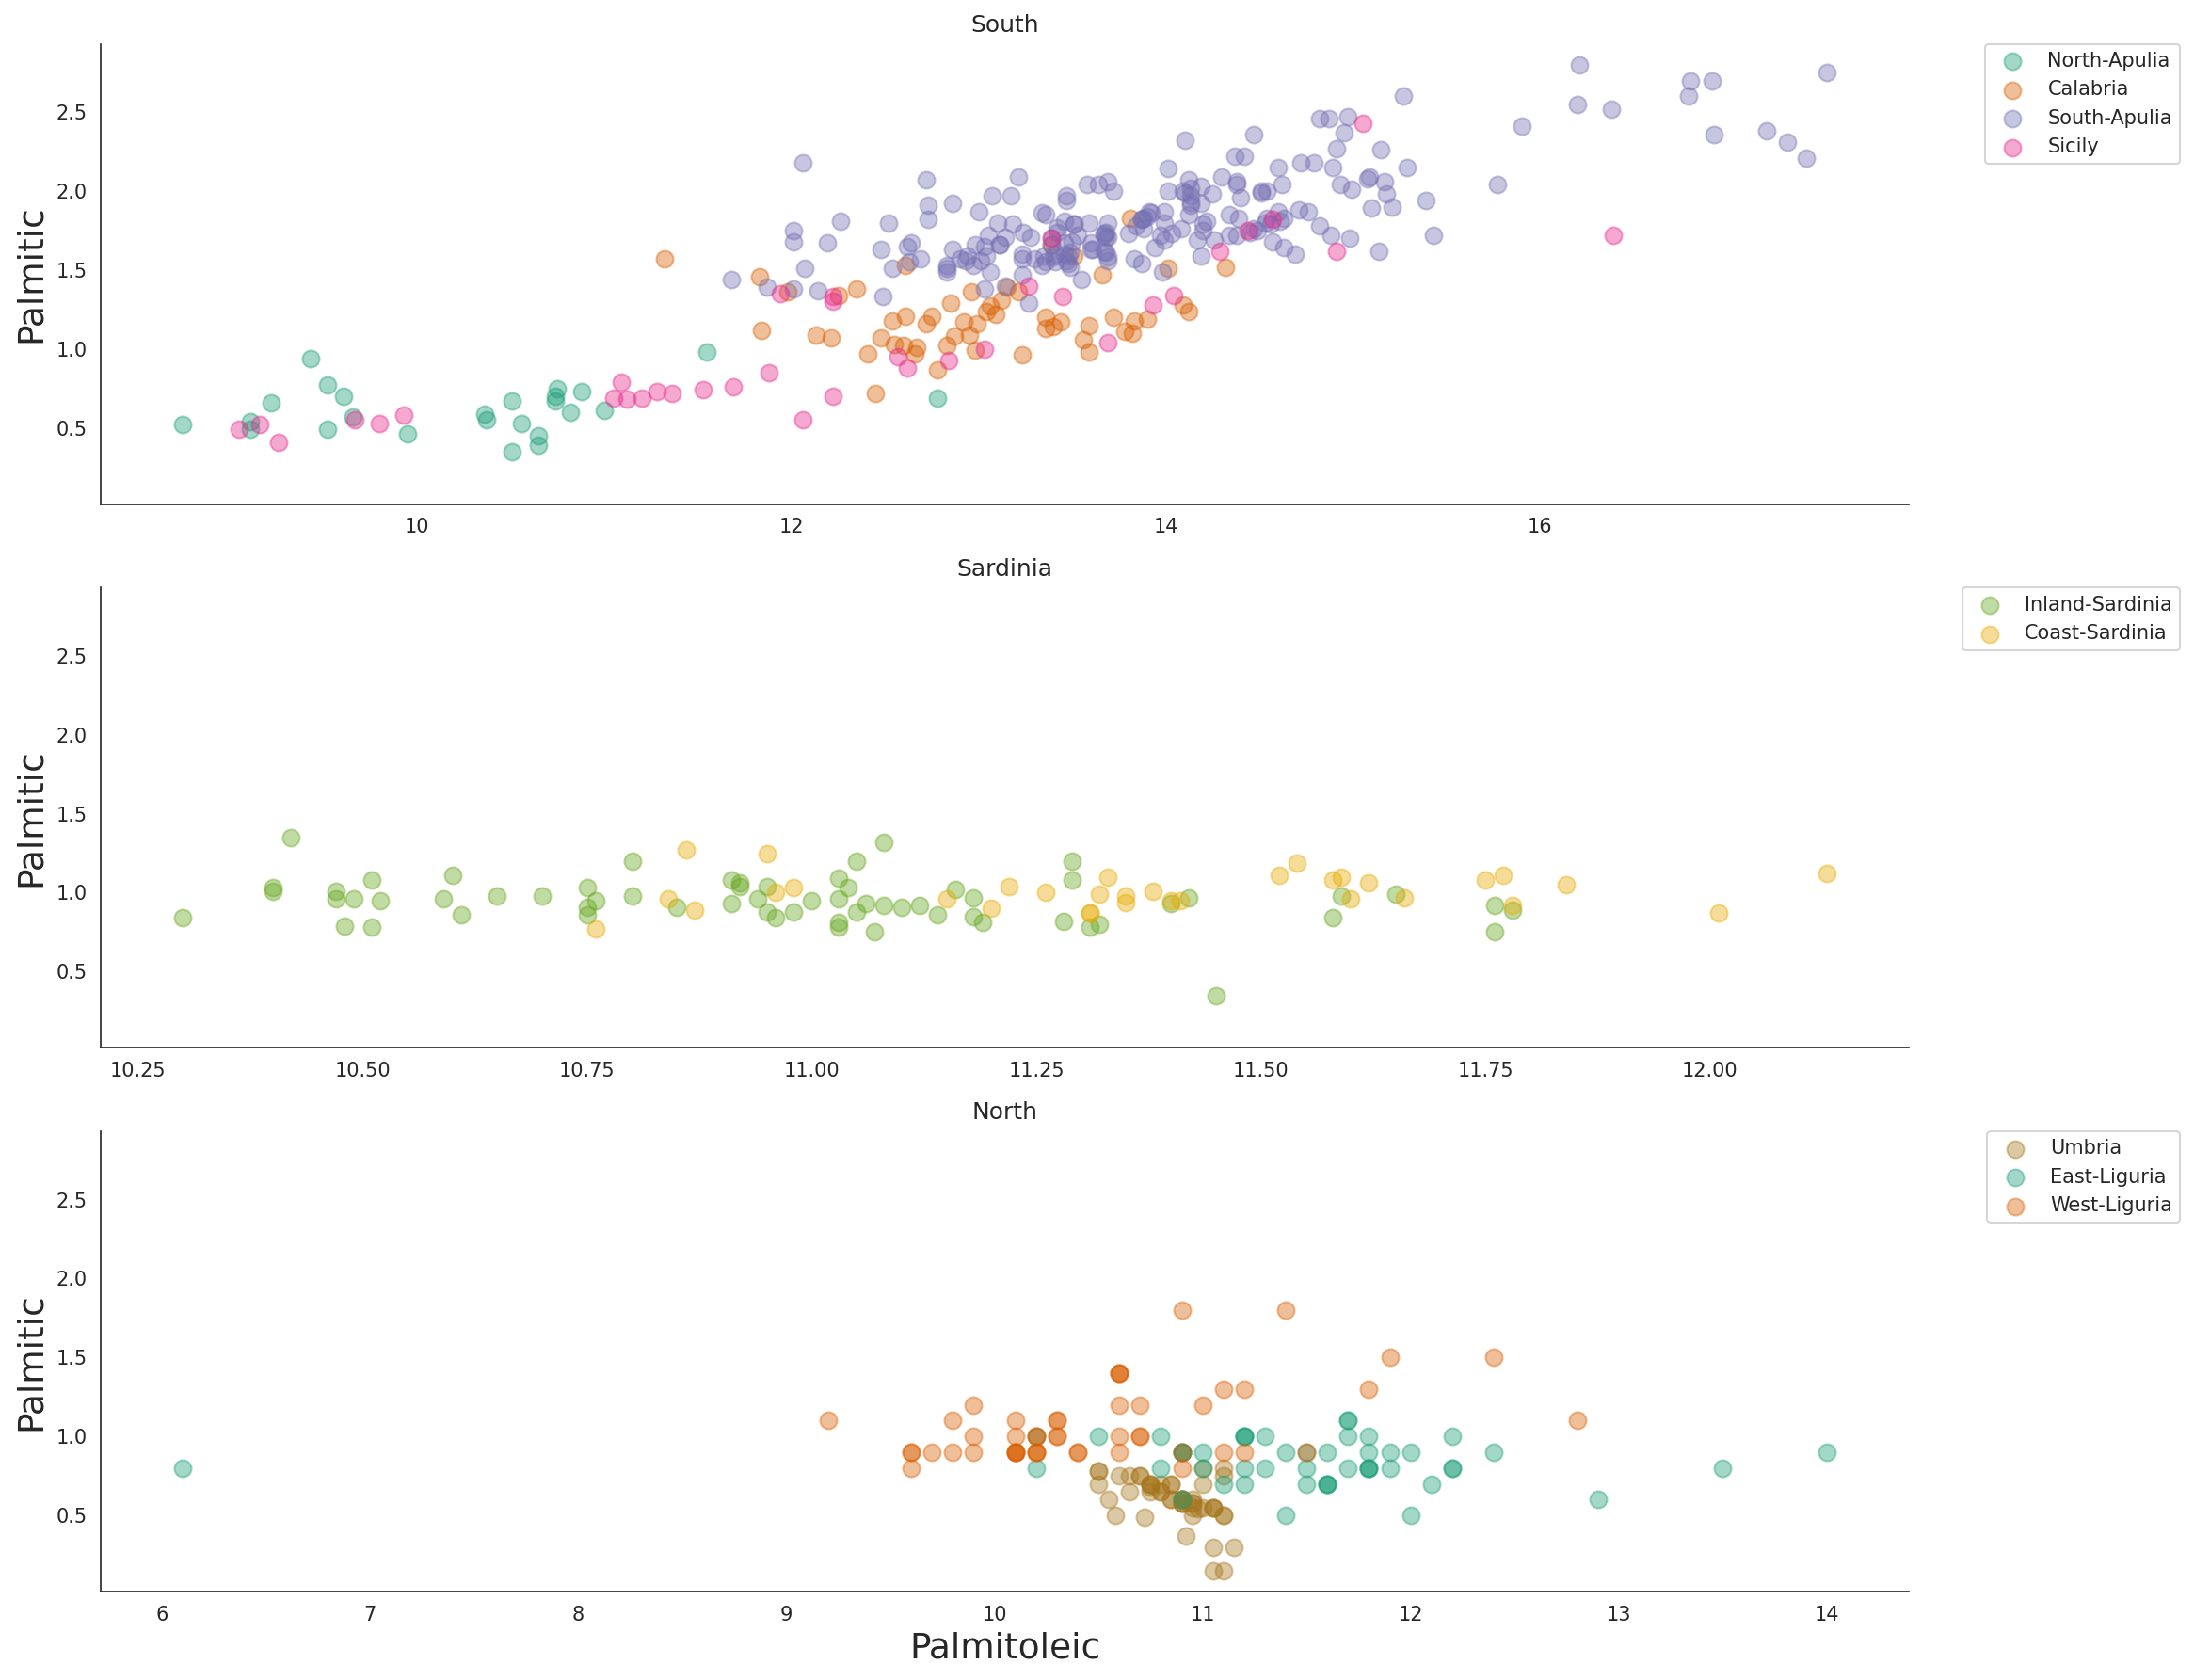

In [13]:
g = sns.FacetGrid(data=dfolive, row='region', hue='areastring', size=4, aspect=4, sharex=False, palette=dark2_colors)
g.map(plt.scatter, 'palmitic', 'palmitoleic', s=75, alpha=0.4)
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    if i == 2: ax.set_xlabel('Palmitoleic', fontsize=18)
    ax.set_ylabel('Palmitic', fontsize=18)
    ax.set_title(rvals[i])
    ax.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0.)
plt.tight_layout()

### Observations in respect to separability from the combination of Linoleic and Oleic fatty acids.<br>
**South**: North and South Apulia<br>
**North**: Umbria and West-Liguria